In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data1 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
data2 = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22])/22

In [4]:
data1.shape

(10,)

In [5]:
n_inputs = 1
n_instance = 1

In [10]:
x_data = tf.placeholder(tf.float32, [None], name='data1')
x = tf.reshape(x_data, [-1, 1, 1])
y = tf.placeholder(tf.int32, [None], name='data2')

In [45]:
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=2)

In [11]:
output, states = tf.nn.dynamic_rnn(cell=rnn_cell, inputs=x, dtype=tf.float32)

In [12]:
states.shape   # 2 coluumns because we have 2 cells

TensorShape([Dimension(None), Dimension(2)])

In [33]:
logit = tf.layers.dense(states, 1, activation=tf.nn.softmax)

In [27]:
logit.shape

TensorShape([Dimension(None), Dimension(22)])

In [28]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logit, name='loss')
loss = tf.reduce_mean(xentropy)

In [29]:
optimiser = tf.train.AdamOptimizer(0.01)
train = optimiser.minimize(loss)

In [30]:
correct = tf.nn.in_top_k(logit, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [31]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    epoch = 500
    errors = []
    for _ in range(epoch):
        feed_dict = {x_data:data1, y:data2}
        sess.run(train, feed_dict)
        errors.append(sess.run(loss, feed_dict))
        acc = sess.run(accuracy, feed_dict)
        states_op = sess.run(states, feed_dict)
        output_op = sess.run(output, feed_dict)

In [55]:
states_op.shape  # [10,, 2] because we have 10 inputs and 2 neuron in the cell

(10, 2)

In [58]:
states_op

array([[ 0.96968764,  0.99889141],
       [ 0.99879563,  0.99999589],
       [ 0.99995291,  1.        ],
       [ 0.99999809,  1.        ],
       [ 0.99999982,  1.        ],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ]], dtype=float32)

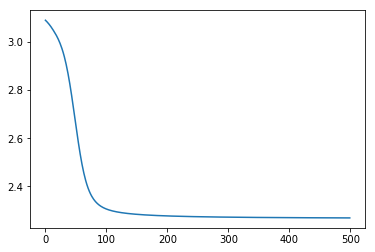

In [47]:
plt.plot(errors)
plt.show()

In [48]:
acc

0.89999998